In [27]:
library(sitePath)
library(ggplot2)
suppressPackageStartupMessages(library(ggtree))

METADATA_DIR <- "Metadata"
REFSEQ_DIR <- "RefSeq"
OUTPUT_DIR <- "Output"

In [38]:
metadata <- read.csv(file.path(METADATA_DIR, "SARS_CoV_2.csv"), row.names = 1)

In [2]:
siteMapping <- read.csv(file.path(REFSEQ_DIR, "SARS_CoV_2.csv"), row.names = 1)

In [4]:
minEntropy <- readRDS("SARS-CoV-2.rds")
paths <- attr(minEntropy, "paths")
snp <- SNPsites(paths)

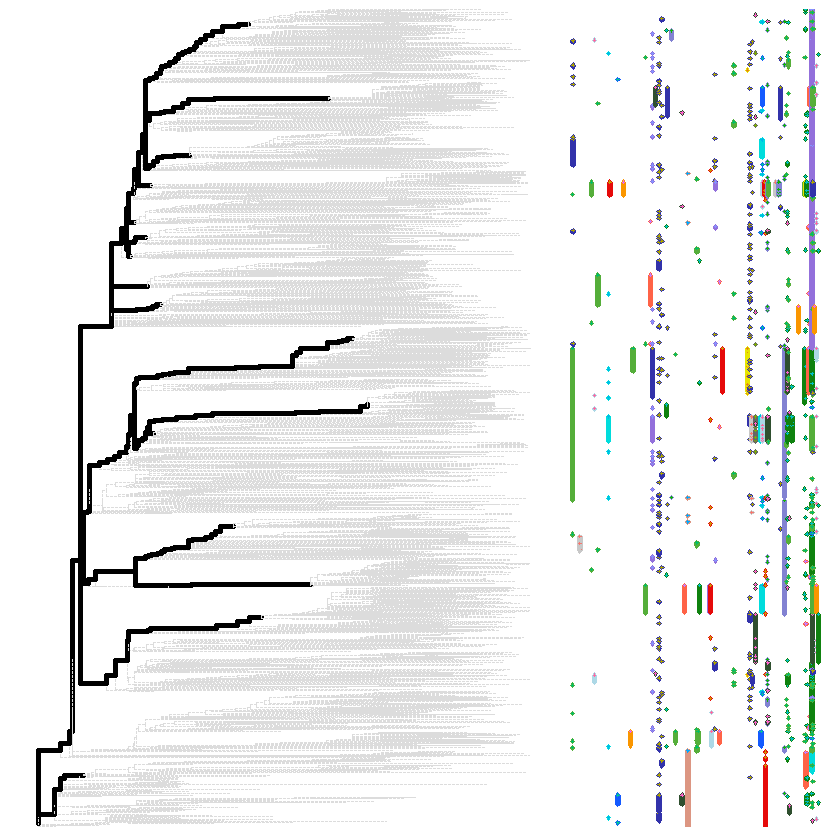

In [5]:
plotMutSites(snp)

In [6]:
fixedSites <- fixationSites(minEntropy)
attr(fixedSites, "clustersByPath") <- sitePath:::.assignClusterNames(attr(fixedSites, "clustersByPath"))

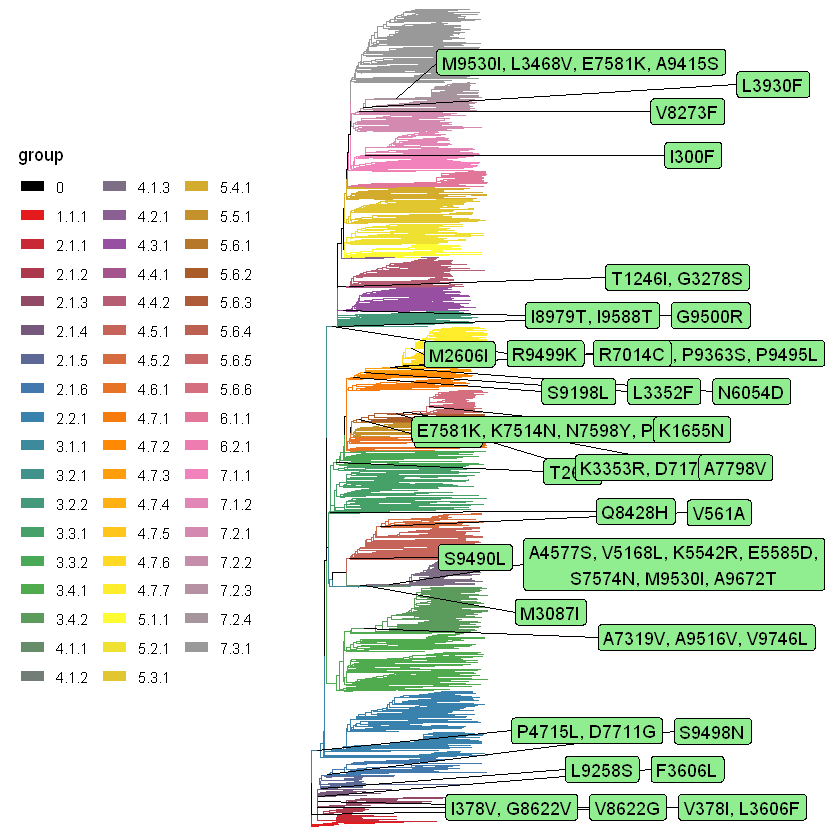

In [37]:
plot(fixedSites, max.overlaps = Inf, nudge_x = 2) + ggplot2::xlim(0, 3)

In [39]:
tree <- as.phylo(fixedSites)

In [46]:
metadata[metadata[["Nextstrain_clade"]] == "20A.EU2", "Nextstrain_clade"] <- "20A"

In [47]:
grp <- split(row.names(metadata), metadata[["Nextstrain_clade"]])

In [49]:
p <- ggtree(groupOTU(tree, grp), aes(color = group)) +
    scale_color_manual(values = c(
        "black",
        "#4F34D2",
        "#4664EB",
        "#4F91E5",
        "#60B2CA",
        "#78C7A4",
        "#95D37F",
        "#B8D763",
        "#DBD350",
        "#F6C445",
        "#FFA43D",
        "#FF7033",
        "#F93529"
    )) +
    guides(color = guide_legend(override.aes = list(size = 3)))

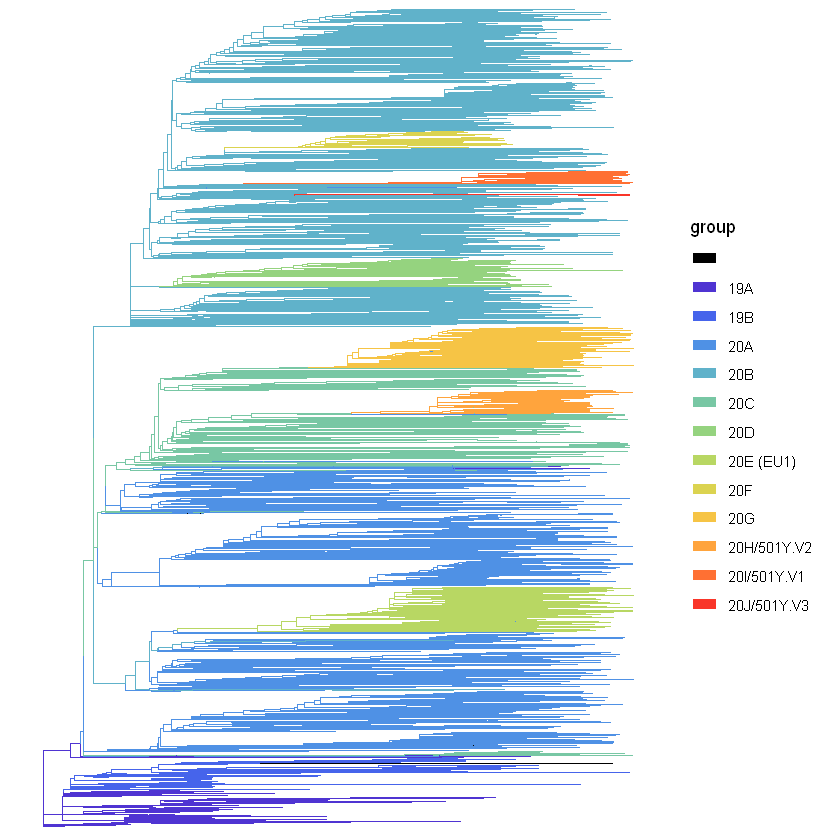

In [50]:
p

In [51]:
ggsave(filename = file.path(OUTPUT_DIR, "nextstrain_18_10.pdf"), plot = p, device = "pdf", width = 10, height = 18)

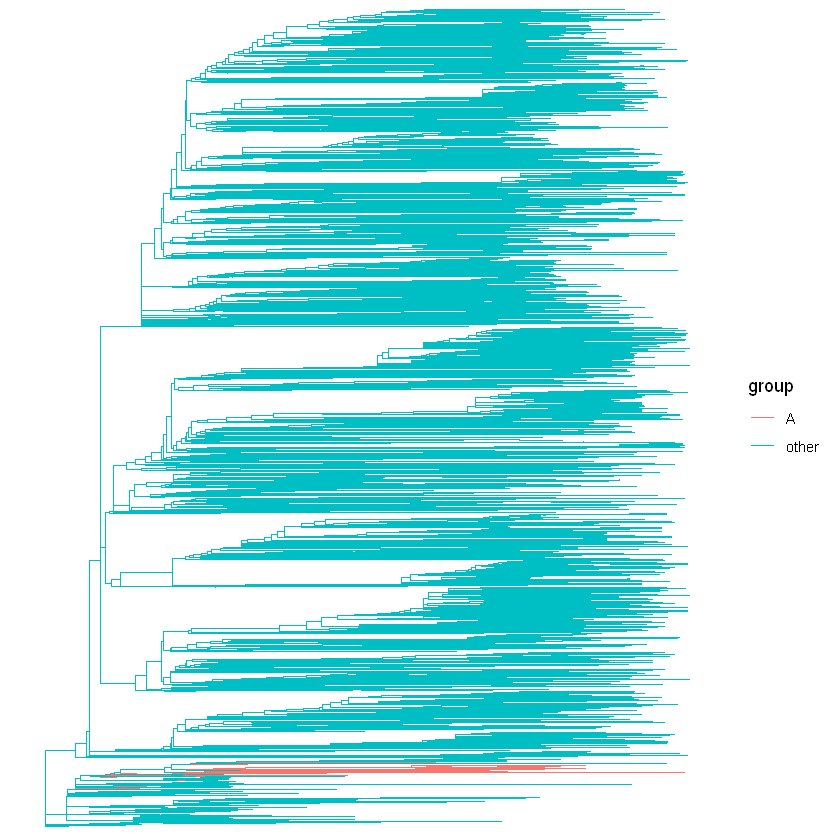

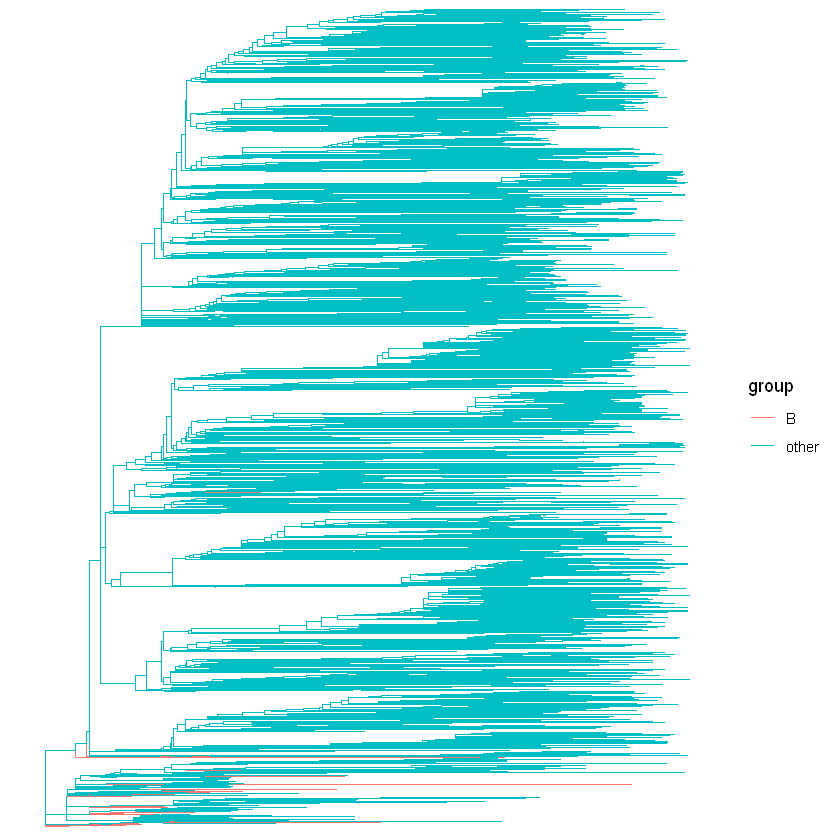

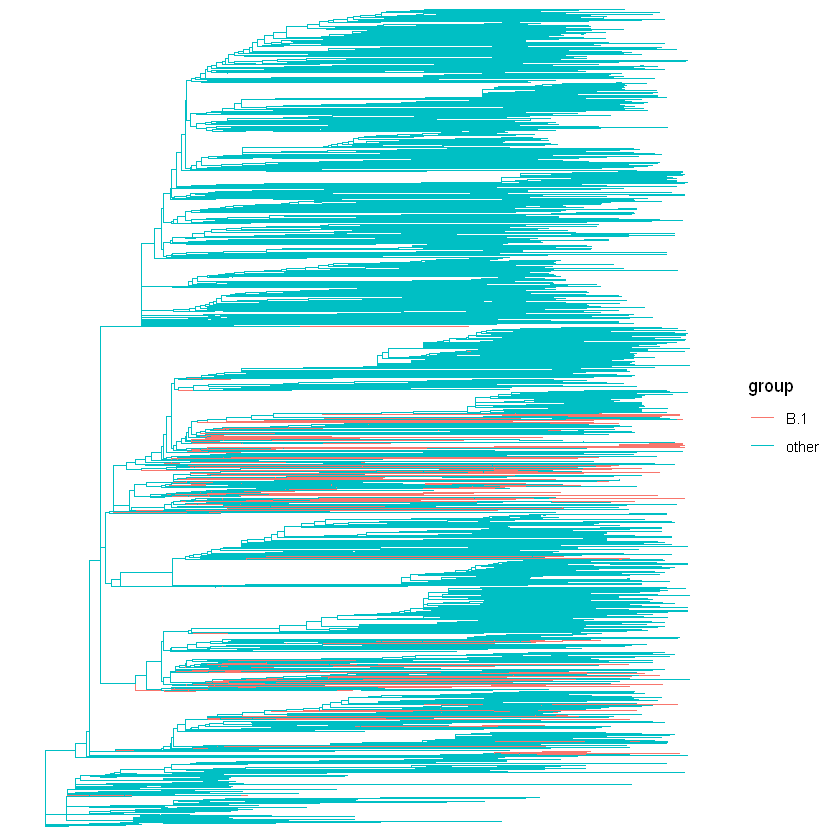

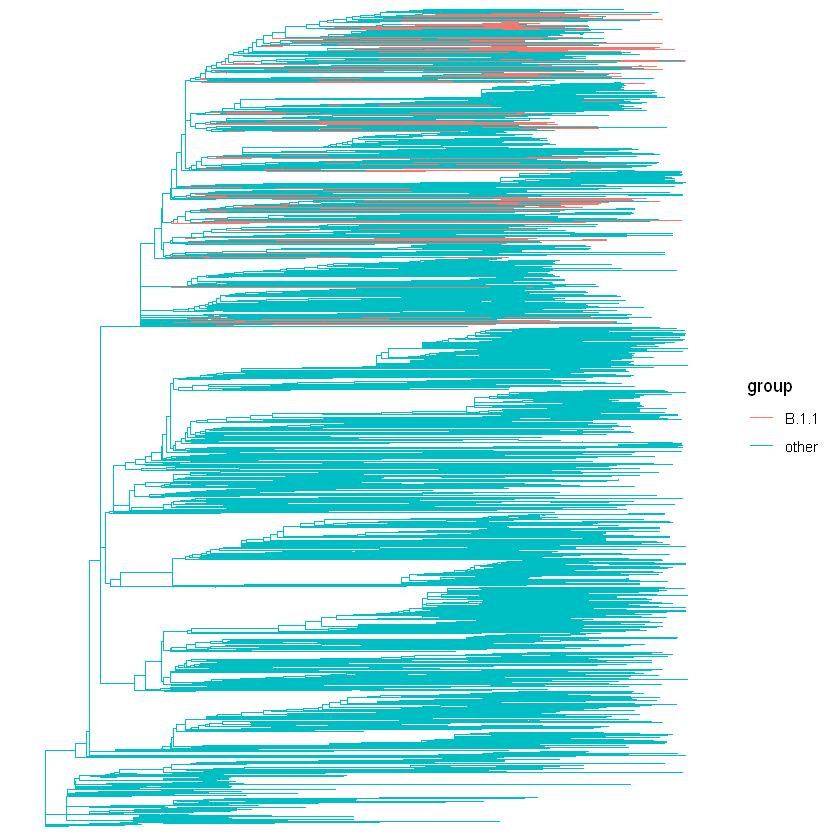

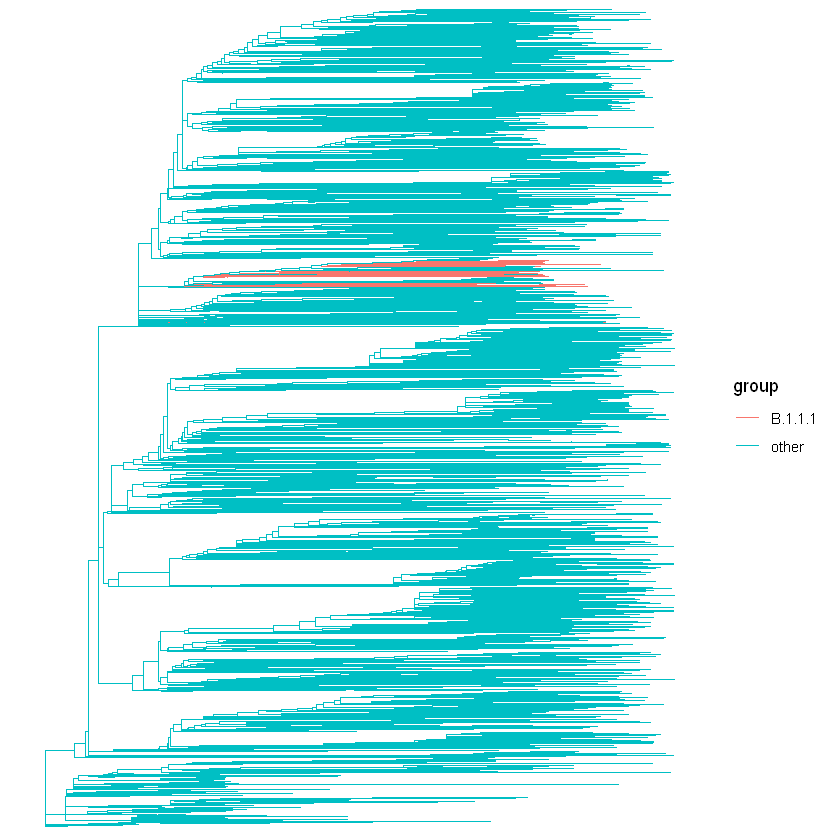

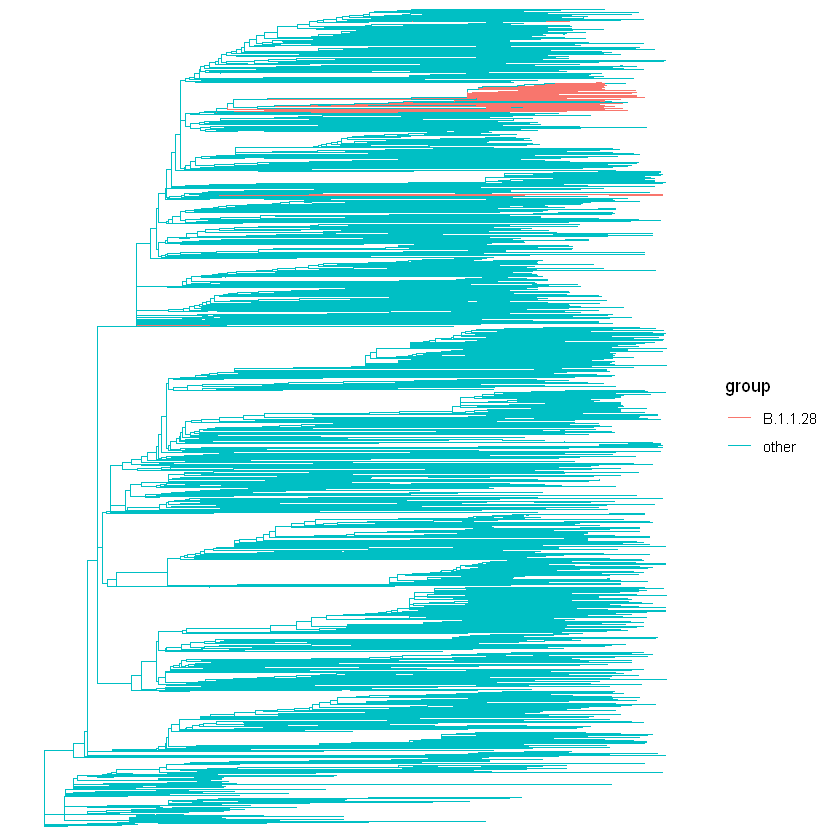

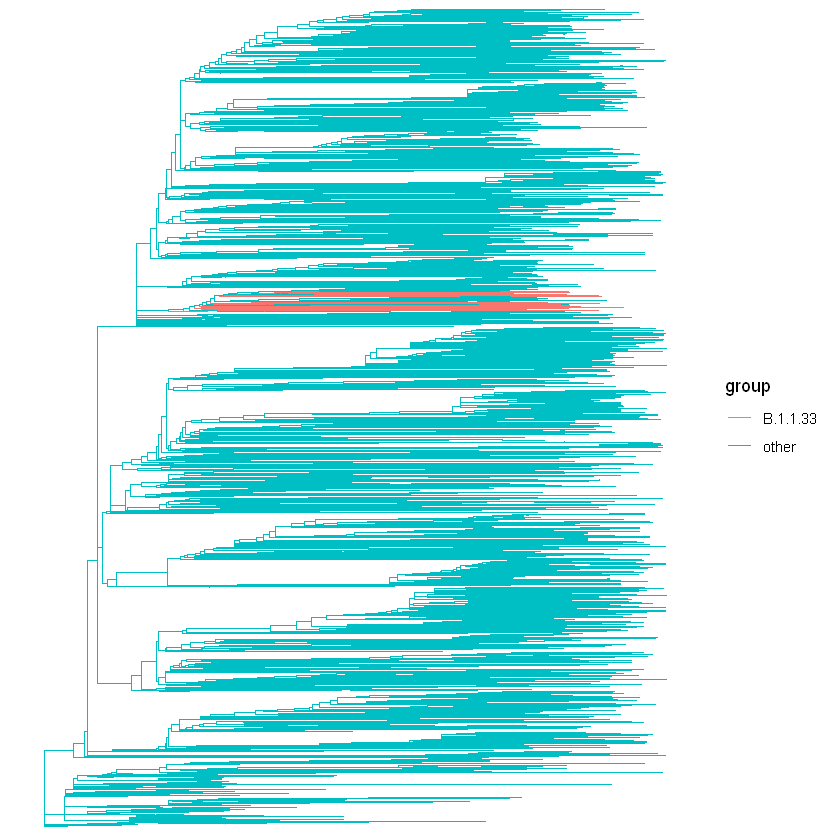

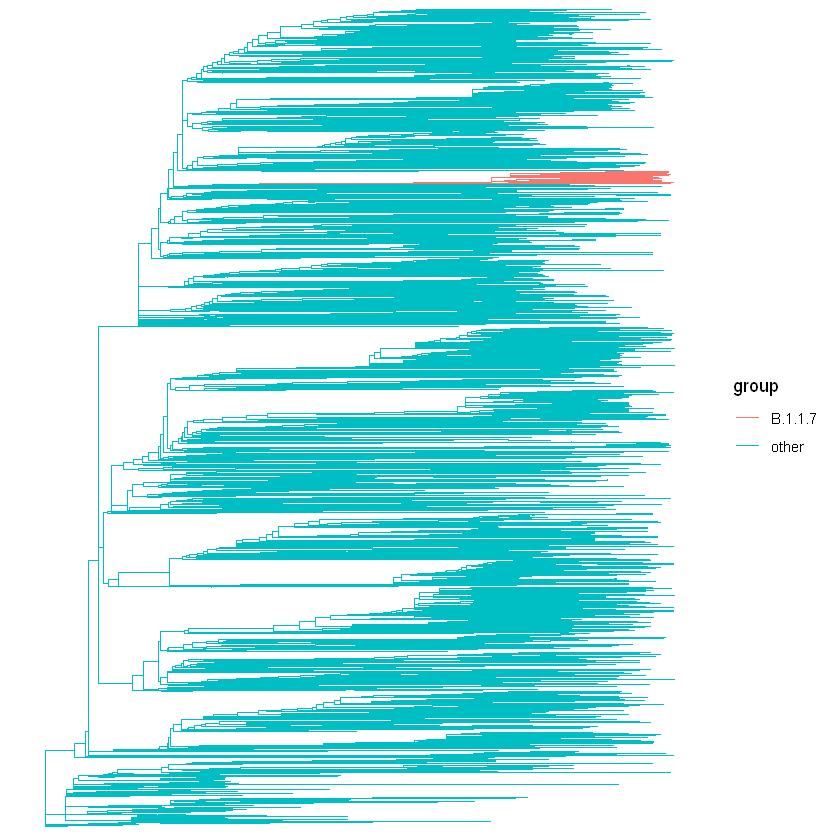

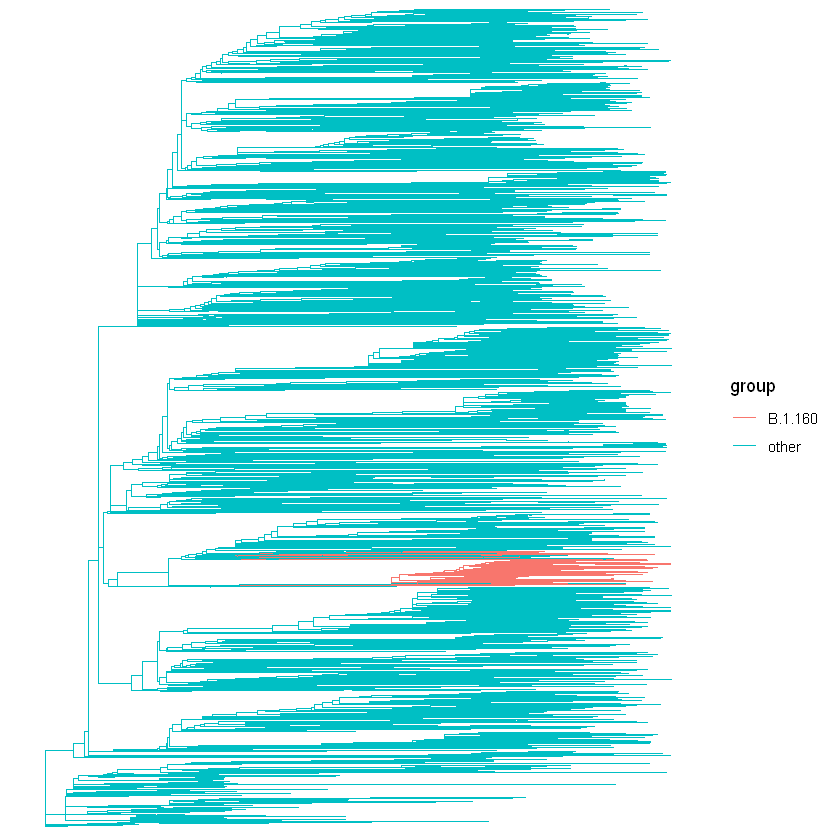

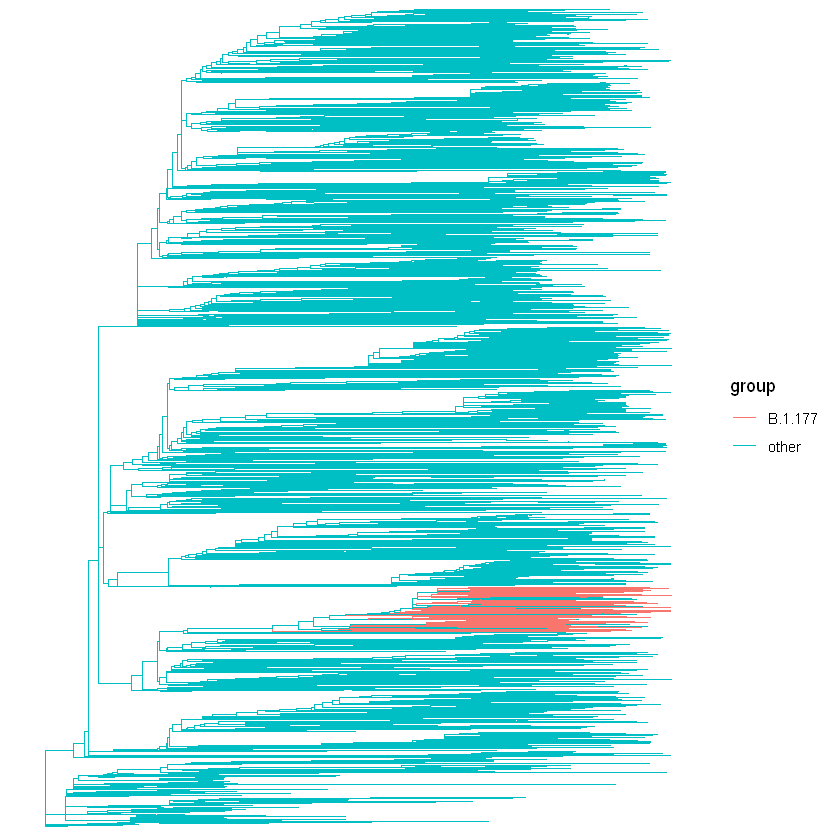

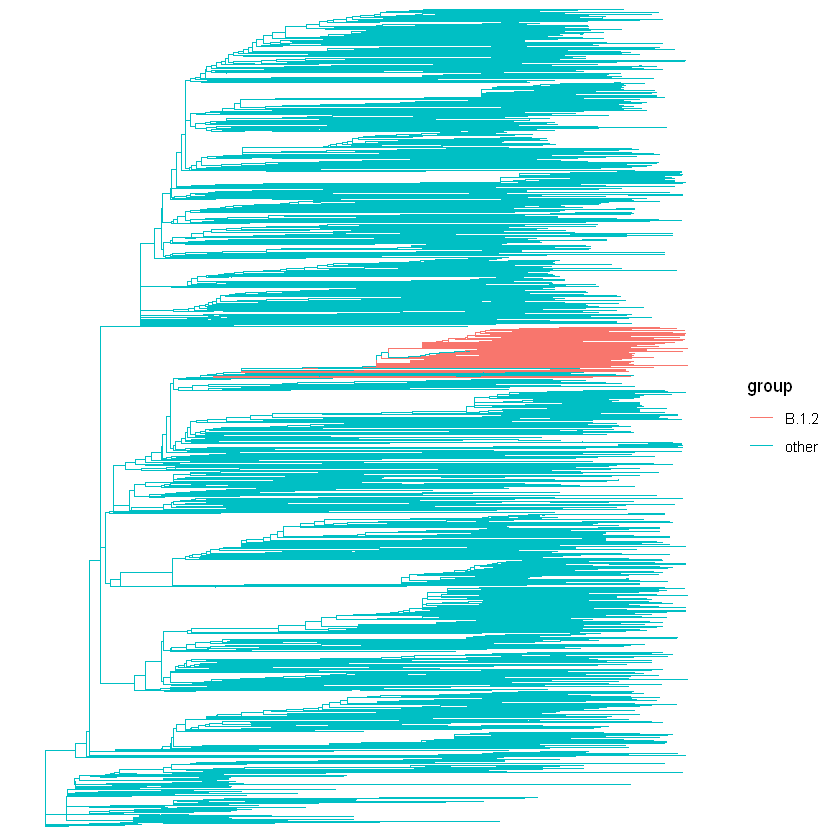

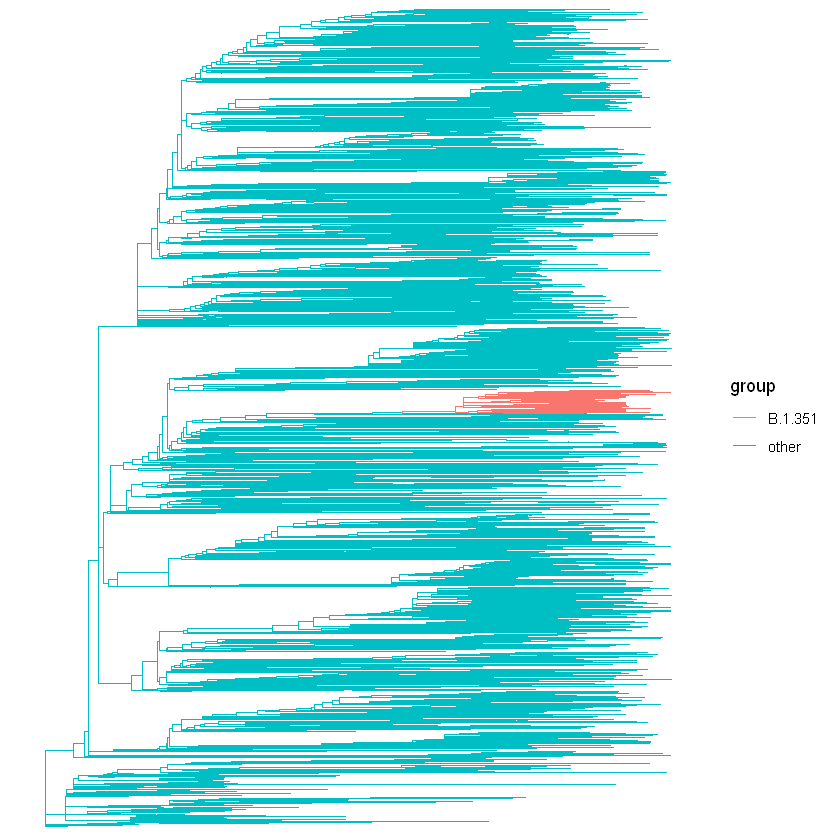

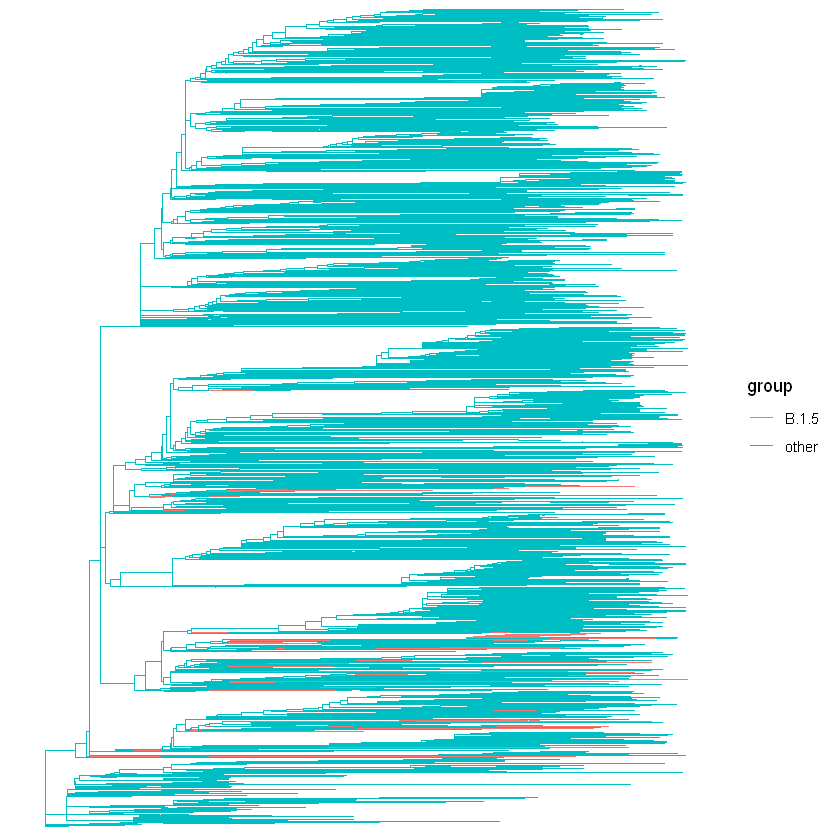

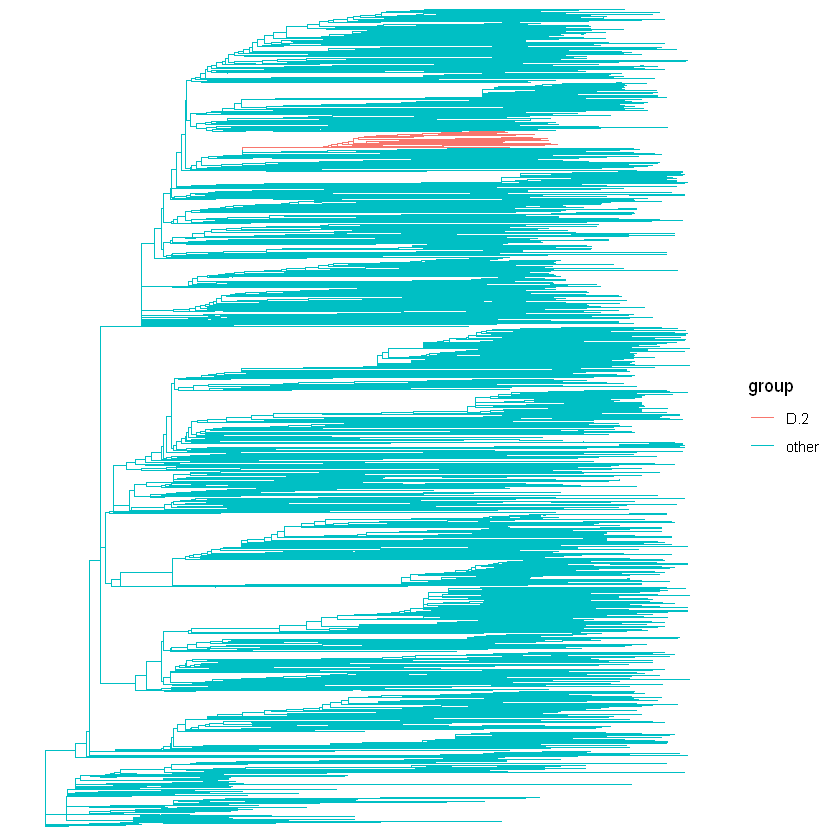

In [8]:
tipClade <- metadata[tree[['tip.label']], ]
tipClade <- split(row.names(tipClade), tipClade[["pangolin_lineage"]])

for (cladeName in names(tipClade)) {
    clade <- list()
    tips <- tipClade[[cladeName]]
    if (length(tips) > 60) {
        clade[[cladeName]] <- tips
        clade[["other"]] <- setdiff(tree[["tip.label"]], tips)
        clade_tree <- groupOTU(tree, clade)
        print(ggtree(clade_tree, aes(color = group)))
    }
}